## Estudo Dirigido: Roubos e Furtos de veículos no estado de São Paulo em 2016/2017

#### Autor: Ramon de Carvalho Nogueira 
#### LinkedIn: https://www.linkedin.com/in/ramonrcn/
#### E-Mail: ramon_rcn@hotmail.com
#### Data de início: 14/02/2018
#### Dados públicos obtidos em http://www.ssp.sp.gov.br/transparenciassp/


# Este estudo tem como objetivos:
    - Exibir de forma objetiva e rápida os dados coletados pela SSP.
    - Responder as seguintes questões:
        - Quais os veículos mais visados?
        - Quais os veículos menos visados?
        - Total de ocorrências para cada modelo.
        - Total de ocorrências por localidade.
        - Cidades com o maior número de ocorrências.
        - Quais as regiões com maior índice de ocorrências?
        - Verificar mês a mês o número de Furtos x Roubos para carros e motos

#### Além de satifazer algumas curiosidades pessoais:
    - Existe uma cor 'preferida' pelos bandidos na hora de levar seu carro?
    - São carros mais novos ou mais velhos?
    Entre outras que irão surgindo durante o processo e que serão destacadas durante o Notebook.
    


# Tratando dos roubos de 2016

Mas antes, vamos deixar claro o que é um Furto e o que é um Roubo.

#### Furto:
    O furto é caracterizado pela tomada de um bem material, sem que haja violência ou ameaça contra a vítima
    Lei: Art. 155.
    Vítima: Não está presente, ou não percebe a ação.

#### Roubo:
    O roubo consiste em um ato de subtrair um bem material de outrem por meio de violência ou ameaça.
    Lei: Art. 157.
    Vítima: A pessoa está presente, e sofre ameaça ou é alvo de violência. 
Fonte: https://www.diferenca.com/furto-e-roubo/

In [2]:
#import das bibliotecas

import pandas as pd
import numpy as np


In [3]:
path = r'C:\Python\Data Science Projects\Roubos e Furtos Veículos\3 - Dados Consolidados\Roubos_2016.txt'
Roubos2016 = pd.read_csv(path, engine='python', sep='\t', parse_dates=["BO_INICIADO", "BO_EMITIDO", "DATAOCORRENCIA", "DATACOMUNICACAO"])
Roubos2016.info() #Exibe um panorama do arquivo importado


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193788 entries, 0 to 193787
Data columns (total 33 columns):
ID                         193788 non-null int64
ANO_BO                     193788 non-null int64
NUM_BO                     193788 non-null int64
BO_INICIADO                193788 non-null datetime64[ns]
BO_EMITIDO                 193788 non-null datetime64[ns]
DATAOCORRENCIA             193788 non-null datetime64[ns]
PERIDOOCORRENCIA           193788 non-null object
DATACOMUNICACAO            193788 non-null datetime64[ns]
BO_AUTORIA                 193788 non-null object
FLAGRANTE                  193788 non-null object
LOGRADOURO                 173370 non-null object
NUMERO                     193632 non-null float64
BAIRRO                     161128 non-null object
CIDADE                     173370 non-null object
UF                         173370 non-null object
LATITUDE                   173235 non-null object
LONGITUDE                  173235 non-null object
DESCRICAO

In [4]:
#Retirando coluna ID que utilizei na hora de fazer o consolidado de roubos 2016
Roubos2016.drop('ID', axis = 1, inplace = True)

In [5]:
Roubos2016.describe(include=['object'])

,PERIDOOCORRENCIA,BO_AUTORIA,FLAGRANTE,LOGRADOURO,BAIRRO,CIDADE,UF,LATITUDE,LONGITUDE,DESCRICAOLOCAL,...,DELEGACIA_CIRCUNSCRICAO,ESPECIE,RUBRICA,STATUS,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,DESCR_TIPO_VEICULO
count,193788,193788,193788,173370,161128,173370,173370,173235,173235,193788,...,193788,193788,193788,193785,137736,138515,138385,138496,138225,138225
unique,5,3,2,32671,7617,414,2,66479,66485,29,...,797,28,205,2,89706,26,1312,16,4196,21
top,A NOITE,Desconhecida,Não,AVENIDA SAPOPEMBA,CENTRO,S.PAULO,SP,"-24,015,896,895","-464,621,344,129,999",Via pública,...,49º D.P. SAO MATEUS,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,Consumado,XXX0000,SP,S.PAULO,Preta,HONDA/CB 300R,AUTOMOVEL
freq,82357,149545,166235,771,4384,81459,173366,335,335,147495,...,5070,137356,118638,192861,78,130823,58211,33335,1885,74573


#### Pontos a serem considerados:
    Data 24/12/2016 - 30/12/2016
    placa XXX0000

In [6]:
Roubos2016['PLACA_VEICULO'].value_counts().head()

XXX0000    78
OOO0000    37
AAA0000    28
FLH5803    24
FJD1613    24
Name: PLACA_VEICULO, dtype: int64

In [7]:
for i,l in Roubos2016.iterrows():
    if l.PLACA_VEICULO == 'XXX0000' or l.PLACA_VEICULO == 'OOO0000' or l.PLACA_VEICULO == 'AAA0000':
        print(i, l.DATAOCORRENCIA,' ',l.DELEGACIA_NOME,' ',l.PLACA_VEICULO,' ',l.UF_VEICULO,' ',
                  l.CIDADE_VEICULO,' ',l.DESCR_TIPO_VEICULO,' ',l.DESCR_MARCA_VEICULO,' ',l.ANO_FABRICACAO )

1977 2016-02-16 00:00:00   50º D.P. ITAIM PAULISTA   OOO0000   SP   GUARULHOS   MOTOCICLO   HONDA/CG 150 TITAN ESD   2008.0
1979 2016-02-16 00:00:00   50º D.P. ITAIM PAULISTA   OOO0000   SP   GUARULHOS   MOTOCICLO   HONDA/CG 150 TITAN ESD   2008.0
1981 2016-02-16 00:00:00   50º D.P. ITAIM PAULISTA   OOO0000   SP   GUARULHOS   MOTOCICLO   HONDA/CG 150 TITAN ESD   2008.0
6724 2016-01-24 00:00:00   DEL.POL.ITATIBA   AAA0000   SP   S.PAULO   INEXIST.   M.A./CATERPILLAR   0.0
10910 2016-06-01 00:00:00   95º D.P. HELIÓPOLIS   AAA0000   SP   S.PAULO   MOTOCICLO   HONDA/CG150 FAN ESDI   nan
10914 2016-06-01 00:00:00   95º D.P. HELIÓPOLIS   AAA0000   SP   S.PAULO   MOTOCICLO   HONDA/CG150 FAN ESDI   nan
10918 2016-06-01 00:00:00   95º D.P. HELIÓPOLIS   AAA0000   SP   S.PAULO   MOTOCICLO   HONDA/CG150 FAN ESDI   nan
10922 2016-06-01 00:00:00   95º D.P. HELIÓPOLIS   AAA0000   SP   S.PAULO   MOTOCICLO   HONDA/CG150 FAN ESDI   nan
18353 2016-04-02 00:00:00   47º D.P. CAPAO REDONDO   XXX0000   SP   

132911 2016-12-09 00:00:00   41º D.P. VILA RICA   XXX0000   SP   S.PAULO   MOTOCICLO   Y/YAMAHA 125   nan
132915 2016-12-09 00:00:00   41º D.P. VILA RICA   XXX0000   SP   S.PAULO   MOTOCICLO   Y/YAMAHA 125   nan
132919 2016-12-09 00:00:00   41º D.P. VILA RICA   XXX0000   SP   S.PAULO   MOTOCICLO   Y/YAMAHA 125   nan
132923 2016-12-09 00:00:00   41º D.P. VILA RICA   XXX0000   SP   S.PAULO   MOTOCICLO   Y/YAMAHA 125   nan
132927 2016-12-09 00:00:00   41º D.P. VILA RICA   XXX0000   SP   S.PAULO   MOTOCICLO   Y/YAMAHA 125   nan
133971 2016-10-10 00:00:00   DEL.POL.EMBU-GUAÇU   XXX0000   SP   S.PAULO   MOTOCICLO   H/HONDA CG 125   nan
133974 2016-10-10 00:00:00   DEL.POL.EMBU-GUAÇU   XXX0000   SP   S.PAULO   MOTOCICLO   H/HONDA CG 125   nan
138264 2016-04-11 00:00:00   DEL.POL.PONTAL   AAA0000   SP   S.PAULO   MOTONETA   H/HONDA 150   nan
138266 2016-04-11 00:00:00   DEL.POL.PONTAL   AAA0000   SP   S.PAULO   MOTONETA   H/HONDA 150   nan
138326 2016-10-20 00:00:00   92º D.P. P. STO ANTONIO  

In [8]:
#Dropando registros com valores inválidos
data = []

for i,l in Roubos2016.iterrows():
    if l.PLACA_VEICULO == 'XXX0000' or l.PLACA_VEICULO == 'OOO0000' or l.PLACA_VEICULO == 'AAA0000':
        data.append(i)

Roubos2016.drop(data, axis=0, inplace=True)
Roubos2016['PLACA_VEICULO'].value_counts().head()

FLH5803    24
FJD1613    24
DIQ7523    19
FQB0386    19
DDA3096    19
Name: PLACA_VEICULO, dtype: int64

In [9]:
#Verificando registros com a coluna PLACA_VEICULO em branco
Roubos2016['PLACA_VEICULO'].isnull().value_counts()

False    137593
True      56052
Name: PLACA_VEICULO, dtype: int64

In [10]:
#Dropando os registros de veículos com a placa em branco
Roubos2016.dropna(subset=['PLACA_VEICULO'], axis = 0, inplace = True)
Roubos2016['PLACA_VEICULO'].isnull().value_counts()

False    137593
Name: PLACA_VEICULO, dtype: int64

#### Aplicando Filtros.
    Analisando o arquivo no Excel, entendi o porquê de tantos registros em duplicidade, principalmente na coluna 'PLACA_VEICULO'
    
    No exemplo abaixo, os registros selecionados mostram o Furto do veículo e a localização do mesmo.
    Logo, é normal do dataset registros em duplicidade, e a filtragem pela placa do veículo não é eficaz.
    
    Portanto, irei tratar as informações tendo como base as colunas 'ESPECIE' e 'RUBRICA', o que irá possibilitar manipular com maior precisão as informações do dataset

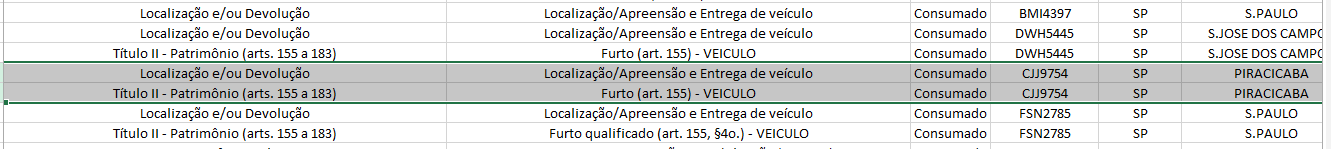

In [11]:
Roubos2016['ESPECIE'].value_counts().head(10)

Título II - Patrimônio (arts. 155 a 183)                 106312
Localização e/ou Devolução                                21549
Ato infracional                                            4592
Título I - Pessoa (arts. 121 a 154)                         806
L 8069/90 - ECA                                             760
Acidente de trânsito                                        561
Título IX - Paz pública (arts. 286 a 288)                   539
Título XI - Administração pública (arts. 312 a 359-H)       451
L 9503/97 - Código de Trânsito Brasileiro                   439
L 10826/03 - Estatuto do Desarmamento                       419
Name: ESPECIE, dtype: int64

In [12]:
Roubos2016['ESPECIE'].isnull().value_counts()

False    137593
Name: ESPECIE, dtype: int64

##### Separando em um novo DF todos os veículos Localizados e/ou Devolvidos em 2016

In [13]:
#dflow = df[df.AAA <= 5]; dflow - Sintaxe base

Roubolocdev2016 = Roubos2016[(Roubos2016.ESPECIE == 'Localização e/ou Devolução')]

Roubolocdev2016.head() 

,ANO_BO,NUM_BO,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,BO_AUTORIA,FLAGRANTE,LOGRADOURO,...,RUBRICA,STATUS,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO
19,2016,99,2016-07-01 14:36:48,2016-07-01 17:03:47,2016-07-01,PELA MANHÃ,2016-07-01,Conhecida,Sim,RUA CANANÉIA,...,Localização/Apreensão e Entrega de veículo,Consumado,GWO3585,SP,VARZEA PAULISTA,Vermelho,FIAT/PALIO WEEKEND,1998.0,1998.0,AUTOMOVEL
25,2016,50,2016-07-01 16:52:53,2016-07-01 17:16:58,2016-07-01,PELA MANHÃ,2016-07-01,Desconhecida,Não,AVENIDA SARGENTO IRACITAN COIMBRA,...,Localização/Apreensão e Entrega de veículo,Consumado,FUR6162,SP,S.PAULO,Preta,FIAT/STRADA ADVENTURE CD,2014.0,2015.0,CAMINHONETE
35,2016,64,2016-07-01 17:03:54,2016-07-01 17:30:12,2016-05-01,A NOITE,2016-07-01,Desconhecida,Não,AVENIDA NORDESTINA,...,Localização/Apreensão e Entrega de veículo,Consumado,EVB2879,SP,S.PAULO,Preta,I/KIA SOUL EX 1.6 FF MT,2011.0,2012.0,CAMIONETA
40,2016,14,2016-07-01 17:19:08,2016-07-01 17:42:47,2016-06-01,A NOITE,2016-07-01,Desconhecida,Não,NaN,...,Localização/Apreensão e Entrega de veículo,Consumado,FTJ2518,SP,S.PAULO,Preta,RENAULT/LOGAN AUTH 1016V,2014.0,2015.0,AUTOMOVEL
48,2016,43,2016-07-01 17:24:06,2016-07-01 17:54:58,2016-07-01,A TARDE,2016-07-01,Desconhecida,Não,RODOVIA SP 270,...,Localização/Apreensão e Entrega de veículo,Consumado,DGY1502,SP,S.PAULO,Branco,DAFRA/RIVA 150 CARGO,2013.0,2013.0,MOTOCICLO


In [14]:
#Checando por registros duplicados filtrando pela placa do veículo
Roubolocdev2016['PLACA_VEICULO'].value_counts().head()

FDL1178    6
EWR4378    6
FIN3781    6
EYG6354    5
FMW2971    5
Name: PLACA_VEICULO, dtype: int64

In [15]:
#Limpando os registros duplicados filtrando pela placa
Roubolocdev2016.drop_duplicates(subset=['PLACA_VEICULO'], keep = 'first', inplace = True)
Roubolocdev2016['PLACA_VEICULO'].value_counts().head()

C:\Users\Ramon\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


DSW4359    1
GKD8178    1
FKW2808    1
FFT3602    1
GCR9675    1
Name: PLACA_VEICULO, dtype: int64

In [16]:
Roubolocdev2016.to_csv('C:\\Python\Data Science Projects\Roubos e Furtos Veículos\\4 - Análises\Roubolocdev2016.csv')

 Com os veículos Localizados e/ou Devolvidos armazenados em um set à parte, irei assumir cada placa como única no Dataset principal
    

In [17]:
Roubos2016.drop_duplicates(subset=['PLACA_VEICULO'], keep = 'first', inplace = True)

In [18]:
Roubos2016.describe(include=['O'])

,PERIDOOCORRENCIA,BO_AUTORIA,FLAGRANTE,LOGRADOURO,BAIRRO,CIDADE,UF,LATITUDE,LONGITUDE,DESCRICAOLOCAL,...,DELEGACIA_CIRCUNSCRICAO,ESPECIE,RUBRICA,STATUS,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,DESCR_TIPO_VEICULO
count,89703,89703,89703,82521,75550,82521,82521,82484,82484,89703,...,89703,89703,89703,89703,89703,89703,89632,89702,89515,89515
unique,5,3,2,31865,7442,409,2,63208,63209,29,...,792,23,139,2,89703,26,1305,16,4127,20
top,A NOITE,Desconhecida,Não,AVENIDA SAPOPEMBA,CENTRO,S.PAULO,SP,"-236,104,715,079,999","-464,404,207,009,999",Via pública,...,49º D.P. SAO MATEUS,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,Consumado,FGR8401,SP,S.PAULO,Preta,HONDA/CB 300R,AUTOMOVEL
freq,41922,81879,85246,338,2128,39038,82520,171,171,66143,...,2211,70724,65215,89623,1,85052,38480,22741,1292,49094


###### Agora, tratando os valores em branco

In [19]:
branco = Roubos2016.isnull()
branco.head(5)

,ANO_BO,NUM_BO,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,BO_AUTORIA,FLAGRANTE,LOGRADOURO,...,RUBRICA,STATUS,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
for column in branco.columns.values.tolist():
    print(column)
    print(branco[column].value_counts())
    print("")


ANO_BO
False    89703
Name: ANO_BO, dtype: int64

NUM_BO
False    89703
Name: NUM_BO, dtype: int64

BO_INICIADO
False    89703
Name: BO_INICIADO, dtype: int64

BO_EMITIDO
False    89703
Name: BO_EMITIDO, dtype: int64

DATAOCORRENCIA
False    89703
Name: DATAOCORRENCIA, dtype: int64

PERIDOOCORRENCIA
False    89703
Name: PERIDOOCORRENCIA, dtype: int64

DATACOMUNICACAO
False    89703
Name: DATACOMUNICACAO, dtype: int64

BO_AUTORIA
False    89703
Name: BO_AUTORIA, dtype: int64

FLAGRANTE
False    89703
Name: FLAGRANTE, dtype: int64

LOGRADOURO
False    82521
True      7182
Name: LOGRADOURO, dtype: int64

NUMERO
False    89683
True        20
Name: NUMERO, dtype: int64

BAIRRO
False    75550
True     14153
Name: BAIRRO, dtype: int64

CIDADE
False    82521
True      7182
Name: CIDADE, dtype: int64

UF
False    82521
True      7182
Name: UF, dtype: int64

LATITUDE
False    82484
True      7219
Name: LATITUDE, dtype: int64

LONGITUDE
False    82484
True      7219
Name: LONGITUDE, dtype: int64


In [21]:
Roubos2016.dropna(subset = ['UF'], axis = 0, inplace = True)
Roubos2016['LATITUDE'].isnull().value_counts().head()

False    82484
True        37
Name: LATITUDE, dtype: int64

In [22]:
Roubos2016.dropna(subset = ['DESCR_MARCA_VEICULO'], axis = 0, inplace = True)
Roubos2016['CIDADE_VEICULO'].isnull().value_counts().head()


False    82263
True        70
Name: CIDADE_VEICULO, dtype: int64

In [23]:
Roubos2016.dropna(subset = ['LATITUDE','UF_VEICULO','CIDADE_VEICULO','ANO_FABRICACAO','ANO_MODELO','DESCR_COR_VEICULO'], axis = 0, inplace = True)

In [24]:
branco = Roubos2016.isnull()

for coluna in branco.columns.values.tolist():
    print(coluna)
    print(branco[coluna].value_counts())
    print('')

ANO_BO
False    82091
Name: ANO_BO, dtype: int64

NUM_BO
False    82091
Name: NUM_BO, dtype: int64

BO_INICIADO
False    82091
Name: BO_INICIADO, dtype: int64

BO_EMITIDO
False    82091
Name: BO_EMITIDO, dtype: int64

DATAOCORRENCIA
False    82091
Name: DATAOCORRENCIA, dtype: int64

PERIDOOCORRENCIA
False    82091
Name: PERIDOOCORRENCIA, dtype: int64

DATACOMUNICACAO
False    82091
Name: DATACOMUNICACAO, dtype: int64

BO_AUTORIA
False    82091
Name: BO_AUTORIA, dtype: int64

FLAGRANTE
False    82091
Name: FLAGRANTE, dtype: int64

LOGRADOURO
False    82091
Name: LOGRADOURO, dtype: int64

NUMERO
False    82091
Name: NUMERO, dtype: int64

BAIRRO
False    75223
True      6868
Name: BAIRRO, dtype: int64

CIDADE
False    82091
Name: CIDADE, dtype: int64

UF
False    82091
Name: UF, dtype: int64

LATITUDE
False    82091
Name: LATITUDE, dtype: int64

LONGITUDE
False    82091
Name: LONGITUDE, dtype: int64

DESCRICAOLOCAL
False    82091
Name: DESCRICAOLOCAL, dtype: int64

EXAME
True     72308
Fa

In [25]:
Roubos2016['ANO_MODELO'] = Roubos2016.ANO_MODELO.astype(int)
Roubos2016['ANO_FABRICACAO'] = Roubos2016.ANO_FABRICACAO.astype(int)
Roubos2016['NUMERO'] = Roubos2016.NUMERO.astype(int)
Roubos2016.head()

,ANO_BO,NUM_BO,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,BO_AUTORIA,FLAGRANTE,LOGRADOURO,...,RUBRICA,STATUS,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO
0,2016,58,2016-07-01 11:11:12,2016-07-01 16:58:29,2016-07-01,PELA MANHÃ,2016-07-01,Conhecida,Sim,RUA SARGENTO MANOEL CHAGAS,...,Perigo para a vida ou saúde de outrem (art. 132),Consumado,EEG0954,SP,S.PAULO,Dourada,HONDA/FIT EX,2008,2008,AUTOMOVEL
1,2016,58,2016-07-01 11:11:12,2016-07-01 16:58:29,2016-07-01,PELA MANHÃ,2016-07-01,Conhecida,Sim,RUA SARGENTO MANOEL CHAGAS,...,Perigo para a vida ou saúde de outrem (art. 132),Consumado,EUX4032,SP,S.PAULO,Cinza,RENAULT/LOGAN EXP 1016V,2013,2013,AUTOMOVEL
15,2016,99,2016-07-01 14:36:48,2016-07-01 17:03:47,2016-07-01,PELA MANHÃ,2016-07-01,Conhecida,Sim,RUA CANANÉIA,...,A.I.-Roubo (art. 157) - VEICULO,Consumado,GWO3585,SP,VARZEA PAULISTA,Vermelho,FIAT/PALIO WEEKEND,1998,1998,AUTOMOVEL
22,2016,28320,2016-07-01 17:09:14,2016-07-01 17:09:14,2016-07-01,DE MADRUGADA,2016-07-01,Desconhecida,Não,AVENIDA CUPECE,...,Roubo (art. 157) - VEICULO,Consumado,FDP2991,SP,SAO BERNARDO DO CAMP,Vermelho,HONDA/CB 300R,2013,2013,MOTOCICLO
23,2016,28034,2016-07-01 17:11:19,2016-07-01 17:11:19,2016-07-01,PELA MANHÃ,2016-07-01,Desconhecida,Não,RUA BEATRIZ BICUDO,...,Roubo (art. 157) - VEICULO,Consumado,DOD6997,SP,AMERICANA,Preta,I/DODGE JOURNEY SXT,2008,2008,CAMIONETA


In [29]:
Roubos2016.reindex()

,ANO_BO,NUM_BO,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,BO_AUTORIA,FLAGRANTE,LOGRADOURO,...,RUBRICA,STATUS,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO
0,2016,58,2016-07-01 11:11:12,2016-07-01 16:58:29,2016-07-01,PELA MANHÃ,2016-07-01,Conhecida,Sim,RUA SARGENTO MANOEL CHAGAS,...,Perigo para a vida ou saúde de outrem (art. 132),Consumado,EEG0954,SP,S.PAULO,Dourada,HONDA/FIT EX,2008,2008,AUTOMOVEL
1,2016,58,2016-07-01 11:11:12,2016-07-01 16:58:29,2016-07-01,PELA MANHÃ,2016-07-01,Conhecida,Sim,RUA SARGENTO MANOEL CHAGAS,...,Perigo para a vida ou saúde de outrem (art. 132),Consumado,EUX4032,SP,S.PAULO,Cinza,RENAULT/LOGAN EXP 1016V,2013,2013,AUTOMOVEL
15,2016,99,2016-07-01 14:36:48,2016-07-01 17:03:47,2016-07-01,PELA MANHÃ,2016-07-01,Conhecida,Sim,RUA CANANÉIA,...,A.I.-Roubo (art. 157) - VEICULO,Consumado,GWO3585,SP,VARZEA PAULISTA,Vermelho,FIAT/PALIO WEEKEND,1998,1998,AUTOMOVEL
22,2016,28320,2016-07-01 17:09:14,2016-07-01 17:09:14,2016-07-01,DE MADRUGADA,2016-07-01,Desconhecida,Não,AVENIDA CUPECE,...,Roubo (art. 157) - VEICULO,Consumado,FDP2991,SP,SAO BERNARDO DO CAMP,Vermelho,HONDA/CB 300R,2013,2013,MOTOCICLO
23,2016,28034,2016-07-01 17:11:19,2016-07-01 17:11:19,2016-07-01,PELA MANHÃ,2016-07-01,Desconhecida,Não,RUA BEATRIZ BICUDO,...,Roubo (art. 157) - VEICULO,Consumado,DOD6997,SP,AMERICANA,Preta,I/DODGE JOURNEY SXT,2008,2008,CAMIONETA
25,2016,50,2016-07-01 16:52:53,2016-07-01 17:16:58,2016-07-01,PELA MANHÃ,2016-07-01,Desconhecida,Não,AVENIDA SARGENTO IRACITAN COIMBRA,...,Localização/Apreensão e Entrega de veículo,Consumado,FUR6162,SP,S.PAULO,Preta,FIAT/STRADA ADVENTURE CD,2014,2015,CAMINHONETE
28,2016,93,2016-07-01 17:16:50,2016-07-01 17:20:52,2016-07-01,A TARDE,2016-07-01,Desconhecida,Não,RUA ARROZEIRA,...,Roubo (art. 157) - VEICULO,Consumado,AUF0481,SP,S.PAULO,Preta,RENAULT/SANDERO PR1616VA,2011,2012,AUTOMOVEL
29,2016,11,2016-07-01 17:02:45,2016-07-01 17:23:58,2016-06-01,PELA MANHÃ,2016-07-01,Desconhecida,Não,RODOVIA SPA 239/340,...,Roubo (art. 157) - VEICULO,Consumado,CLH9495,SP,CASA BRANCA,Azul,M.BENZ/L 1620,2007,2007,CAMINHÃO
31,2016,179,2016-07-01 16:53:49,2016-07-01 17:27:45,2016-07-01,PELA MANHÃ,2016-07-01,Desconhecida,Não,AVENIDA TENENTE AMARO FELICISSIMO DA SIL,...,Roubo (art. 157) - CARGA,Consumado,FLB9553,SP,DIADEMA,Branco,FIAT/DUCATO CARGO,2013,2014,CAMINHONETE
35,2016,64,2016-07-01 17:03:54,2016-07-01 17:30:12,2016-05-01,A NOITE,2016-07-01,Desconhecida,Não,AVENIDA NORDESTINA,...,Localização/Apreensão e Entrega de veículo,Consumado,EVB2879,SP,S.PAULO,Preta,I/KIA SOUL EX 1.6 FF MT,2011,2012,CAMIONETA


In [27]:
Roubos2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82091 entries, 0 to 193783
Data columns (total 32 columns):
ANO_BO                     82091 non-null int64
NUM_BO                     82091 non-null int64
BO_INICIADO                82091 non-null datetime64[ns]
BO_EMITIDO                 82091 non-null datetime64[ns]
DATAOCORRENCIA             82091 non-null datetime64[ns]
PERIDOOCORRENCIA           82091 non-null object
DATACOMUNICACAO            82091 non-null datetime64[ns]
BO_AUTORIA                 82091 non-null object
FLAGRANTE                  82091 non-null object
LOGRADOURO                 82091 non-null object
NUMERO                     82091 non-null int32
BAIRRO                     75223 non-null object
CIDADE                     82091 non-null object
UF                         82091 non-null object
LATITUDE                   82091 non-null object
LONGITUDE                  82091 non-null object
DESCRICAOLOCAL             82091 non-null object
EXAME                      9

In [36]:
#Salvando o DF como .csv para uma análise mais detalhada
Roubos2016.to_csv('C:\\Python\Data Science Projects\Roubos e Furtos Veículos\\3 - Dados Consolidados\Roubos2016_v1.csv')

### Tratando os dados de Roubos de 2017

In [30]:
path = r'C:\Python\Data Science Projects\Roubos e Furtos Veículos\3 - Dados Consolidados\Roubos_2017.txt'
Roubos2017 = pd.read_csv(path, engine='python', sep='\t', parse_dates=["BO_INICIADO", "BO_EMITIDO", "DATAOCORRENCIA", "DATACOMUNICACAO"])
Roubos2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172872 entries, 0 to 172871
Data columns (total 33 columns):
ID                         172872 non-null int64
ANO_BO                     172872 non-null int64
NUM_BO                     172872 non-null int64
BO_INICIADO                172872 non-null datetime64[ns]
BO_EMITIDO                 172872 non-null datetime64[ns]
DATAOCORRENCIA             172872 non-null datetime64[ns]
PERIDOOCORRENCIA           172872 non-null object
DATACOMUNICACAO            172872 non-null datetime64[ns]
BO_AUTORIA                 172872 non-null object
FLAGRANTE                  172872 non-null object
LOGRADOURO                 155655 non-null object
NUMERO                     172762 non-null float64
BAIRRO                     147201 non-null object
CIDADE                     155655 non-null object
UF                         155655 non-null object
LATITUDE                   155565 non-null object
LONGITUDE                  155565 non-null object
DESCRICAO

In [33]:
#Retirando coluna ID que utilizei na hora de fazer o consolidado de roubos 2016
Roubos2017.drop(['ID'], axis = 1, inplace = True)

In [34]:
Roubos2017.describe(include = ['O'])

,PERIDOOCORRENCIA,BO_AUTORIA,FLAGRANTE,LOGRADOURO,BAIRRO,CIDADE,UF,LATITUDE,LONGITUDE,DESCRICAOLOCAL,...,DELEGACIA_CIRCUNSCRICAO,ESPECIE,RUBRICA,STATUS,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,DESCR_TIPO_VEICULO
count,172872,172872,172872,155655,147201,155655,155655,155565,155565,172872,...,172872,172872,172872,172868,121995,122638,122521,122638,122505,122505
unique,5,3,2,29820,6291,428,1,58281,58284,26,...,810,31,198,2,78457,27,1284,16,4176,19
top,A NOITE,Desconhecida,Não,RODOVIA PRESIDENTE DUTRA (BR 116),CENTRO,S.PAULO,SP,"-236,104,715,079,999","-464,404,207,009,999",Via pública,...,49º D.P. SAO MATEUS,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,Consumado,XXX0000,SP,S.PAULO,Branco,HYUNDAI/HB20 1.0M COMFOR,AUTOMOVEL
freq,71468,132263,146277,1074,4416,72038,155655,480,480,134959,...,4279,121209,104333,172019,87,113963,50623,29192,1364,66452


In [36]:
Roubos2017['PLACA_VEICULO'].value_counts().head()

XXX0000    87
OOO0000    23
EHA5928    18
CWP1730    18
DDT7949    16
Name: PLACA_VEICULO, dtype: int64

In [38]:
#Dropando registros com valores inválidos
data = []

for i,l in Roubos2017.iterrows():
    if l.PLACA_VEICULO == 'XXX0000' or l.PLACA_VEICULO == 'OOO0000':
        data.append(i)

Roubos2017.drop(data, axis=0, inplace=True)
Roubos2017['PLACA_VEICULO'].value_counts().head()

EHA5928    18
CWP1730    18
DSJ0345    16
DDT7949    16
DUT3390    15
Name: PLACA_VEICULO, dtype: int64

In [40]:
Roubos2017['PLACA_VEICULO'].isnull().value_counts()

False    121885
True      50877
Name: PLACA_VEICULO, dtype: int64

In [41]:
#dflow = df[df.AAA <= 5]; dflow - Sintaxe base

Roubolocdev2017 = Roubos2017[(Roubos2017.ESPECIE == 'Localização e/ou Devolução')]

Roubolocdev2017.head() 

,ANO_BO,NUM_BO,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,BO_AUTORIA,FLAGRANTE,LOGRADOURO,...,RUBRICA,STATUS,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO
9,2017,987,2017-03-02 12:09:39,2017-03-02 12:33:03,2017-02-02,A NOITE,2017-03-02,Desconhecida,Não,RUA NAME,...,Localização/Apreensão e Entrega de veículo,Consumado,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
10,2017,987,2017-03-02 12:09:39,2017-03-02 12:33:03,2017-02-02,A NOITE,2017-03-02,Desconhecida,Não,RUA NAME,...,Localização/Apreensão e Entrega de veículo,Consumado,EJF5057,SP,S.PAULO,Prata,PEUGEOT/207PASSION XR S,2009.0,2009.0,AUTOMOVEL
13,2017,449,2017-03-02 12:21:37,2017-03-02 12:40:56,2017-02-02,A NOITE,2017-03-02,Desconhecida,Não,RUA PADRE DONIZETE,...,Localização/Apreensão e Entrega de veículo,Consumado,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
14,2017,449,2017-03-02 12:21:37,2017-03-02 12:40:56,2017-02-02,A NOITE,2017-03-02,Desconhecida,Não,RUA PADRE DONIZETE,...,Localização/Apreensão e Entrega de veículo,Consumado,ERC0305,SP,S.ANDRE,Cinza,FIAT/STRADA ADVENTURE CD,2011.0,2011.0,CAMINHONETE
23,2017,591,2017-03-02 12:39:02,2017-03-02 12:47:59,2017-03-02,DE MADRUGADA,2017-03-02,Desconhecida,Não,RUA DAS MONÇÕES,...,Localização/Apreensão e Entrega de veículo,Consumado,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN


In [42]:
#Checando por registros duplicados filtrando pela placa do veículo
Roubolocdev2017['PLACA_VEICULO'].value_counts().head()

FEJ0059    6
GFY5909    6
IMM1648    6
EQM2520    5
FEH1733    5
Name: PLACA_VEICULO, dtype: int64

In [43]:
#Limpando os registros duplicados filtrando pela placa
Roubolocdev2017.drop_duplicates(subset=['PLACA_VEICULO'], keep = 'first', inplace = True)
Roubolocdev2017['PLACA_VEICULO'].value_counts().head()

C:\Users\Ramon\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


ENX9138    1
FNM5130    1
OQC0647    1
FMR3202    1
FBA7197    1
Name: PLACA_VEICULO, dtype: int64

In [44]:
Roubolocdev2017.dropna(subset = ['CIDADE_VEICULO','UF_VEICULO','PLACA_VEICULO','DESCR_COR_VEICULO','DESCR_MARCA_VEICULO'], axis = 0, inplace = True)

C:\Users\Ramon\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
Roubolocdev2017.head()

,ANO_BO,NUM_BO,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,BO_AUTORIA,FLAGRANTE,LOGRADOURO,...,RUBRICA,STATUS,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO
10,2017,987,2017-03-02 12:09:39,2017-03-02 12:33:03,2017-02-02,A NOITE,2017-03-02,Desconhecida,Não,RUA NAME,...,Localização/Apreensão e Entrega de veículo,Consumado,EJF5057,SP,S.PAULO,Prata,PEUGEOT/207PASSION XR S,2009.0,2009.0,AUTOMOVEL
14,2017,449,2017-03-02 12:21:37,2017-03-02 12:40:56,2017-02-02,A NOITE,2017-03-02,Desconhecida,Não,RUA PADRE DONIZETE,...,Localização/Apreensão e Entrega de veículo,Consumado,ERC0305,SP,S.ANDRE,Cinza,FIAT/STRADA ADVENTURE CD,2011.0,2011.0,CAMINHONETE
24,2017,591,2017-03-02 12:39:02,2017-03-02 12:47:59,2017-03-02,DE MADRUGADA,2017-03-02,Desconhecida,Não,RUA DAS MONÇÕES,...,Localização/Apreensão e Entrega de veículo,Consumado,BPS3450,SP,S.ANDRE,Preta,JTA/SUZUKI BANDIT 650,2007.0,2008.0,MOTOCICLO
28,2017,280,2017-03-02 12:19:40,2017-03-02 12:56:33,2017-03-02,DE MADRUGADA,2017-03-02,Desconhecida,Não,AVENIDA ALBERTO SANTOS DUMONT,...,Localização/Apreensão e Entrega de veículo,Consumado,EFU3628,SP,OSASCO,Prata,I/M.BENZ313CDI SPRINTERM,2010.0,2010.0,MICRO-ONIBUS
33,2017,532,2017-03-02 12:55:37,2017-03-02 13:02:59,2017-03-02,DE MADRUGADA,2017-03-02,Desconhecida,Não,AVENIDA DOUTOR VITAL BRASIL,...,Localização/Apreensão e Entrega de veículo,Consumado,ETS9820,SP,DIADEMA,Prata,I/HYUNDAI I30 2.0,2010.0,2011.0,AUTOMOVEL


In [46]:
Roubolocdev2017.to_csv('C:\\Python\Data Science Projects\Roubos e Furtos Veículos\\4 - Análises\Roubolocdev2017.csv')

Tratando valores em branco

In [48]:
branco = Roubos2017.isnull()
branco.head()

,ANO_BO,NUM_BO,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,BO_AUTORIA,FLAGRANTE,LOGRADOURO,...,RUBRICA,STATUS,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,True,True,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,True,True,True,True,True,False,False,True
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,...,False,False,True,True,True,True,True,False,False,True


In [49]:
for column in branco.columns.values.tolist():
    print(column)
    print(branco[column].value_counts())
    print("")


ANO_BO
False    172762
Name: ANO_BO, dtype: int64

NUM_BO
False    172762
Name: NUM_BO, dtype: int64

BO_INICIADO
False    172762
Name: BO_INICIADO, dtype: int64

BO_EMITIDO
False    172762
Name: BO_EMITIDO, dtype: int64

DATAOCORRENCIA
False    172762
Name: DATAOCORRENCIA, dtype: int64

PERIDOOCORRENCIA
False    172762
Name: PERIDOOCORRENCIA, dtype: int64

DATACOMUNICACAO
False    172762
Name: DATACOMUNICACAO, dtype: int64

BO_AUTORIA
False    172762
Name: BO_AUTORIA, dtype: int64

FLAGRANTE
False    172762
Name: FLAGRANTE, dtype: int64

LOGRADOURO
False    155557
True      17205
Name: LOGRADOURO, dtype: int64

NUMERO
False    172652
True        110
Name: NUMERO, dtype: int64

BAIRRO
False    147110
True      25652
Name: BAIRRO, dtype: int64

CIDADE
False    155557
True      17205
Name: CIDADE, dtype: int64

UF
False    155557
True      17205
Name: UF, dtype: int64

LATITUDE
False    155467
True      17295
Name: LATITUDE, dtype: int64

LONGITUDE
False    155467
True      17295
Name: L

In [52]:
Roubos2017.dropna(subset = ['UF'], axis = 0, inplace = True)
Roubos2017['LATITUDE'].isnull().value_counts().head()

False    155467
True         90
Name: LATITUDE, dtype: int64

In [53]:
Roubos2017.dropna(subset = ['DESCR_MARCA_VEICULO'], axis = 0, inplace = True)
Roubos2017['CIDADE_VEICULO'].isnull().value_counts().head()

False    111181
True        115
Name: CIDADE_VEICULO, dtype: int64

In [56]:
Roubos2017.dropna(subset = ['LATITUDE','STATUS','PLACA_VEICULO','UF_VEICULO',
                            'CIDADE_VEICULO','ANO_FABRICACAO','ANO_MODELO','DESCR_COR_VEICULO'], axis = 0, inplace = True)

In [57]:
branco = Roubos2017.isnull()

for coluna in branco.columns.values.tolist():
    print(coluna)
    print(branco[coluna].value_counts())
    print('')

ANO_BO
False    110375
Name: ANO_BO, dtype: int64

NUM_BO
False    110375
Name: NUM_BO, dtype: int64

BO_INICIADO
False    110375
Name: BO_INICIADO, dtype: int64

BO_EMITIDO
False    110375
Name: BO_EMITIDO, dtype: int64

DATAOCORRENCIA
False    110375
Name: DATAOCORRENCIA, dtype: int64

PERIDOOCORRENCIA
False    110375
Name: PERIDOOCORRENCIA, dtype: int64

DATACOMUNICACAO
False    110375
Name: DATACOMUNICACAO, dtype: int64

BO_AUTORIA
False    110375
Name: BO_AUTORIA, dtype: int64

FLAGRANTE
False    110375
Name: FLAGRANTE, dtype: int64

LOGRADOURO
False    110375
Name: LOGRADOURO, dtype: int64

NUMERO
False    110375
Name: NUMERO, dtype: int64

BAIRRO
False    103838
True       6537
Name: BAIRRO, dtype: int64

CIDADE
False    110375
Name: CIDADE, dtype: int64

UF
False    110375
Name: UF, dtype: int64

LATITUDE
False    110375
Name: LATITUDE, dtype: int64

LONGITUDE
False    110375
Name: LONGITUDE, dtype: int64

DESCRICAOLOCAL
False    110375
Name: DESCRICAOLOCAL, dtype: int64

EXAME

In [58]:
Roubos2017['ANO_MODELO'] = Roubos2017.ANO_MODELO.astype(int)
Roubos2017['ANO_FABRICACAO'] = Roubos2017.ANO_FABRICACAO.astype(int)
Roubos2017['NUMERO'] = Roubos2017.NUMERO.astype(int)
Roubos2017.head()

,ANO_BO,NUM_BO,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,BO_AUTORIA,FLAGRANTE,LOGRADOURO,...,RUBRICA,STATUS,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO
1,2017,687,2017-03-02 09:11:22,2017-03-02 12:15:53,2017-03-02,PELA MANHÃ,2017-03-02,Conhecida,Sim,RUA DOS CUNHA,...,Roubo (art. 157) - VEICULO,Consumado,FYB8404,SP,PERUIBE,Branco,FORD/ECOSPORT SE AT 1.6B,2016,2017,CAMIONETA
6,2017,309,2017-03-02 12:17:12,2017-03-02 12:22:22,2017-02-02,A NOITE,2017-03-02,Desconhecida,Não,ESTRADA DO ELENCO,...,Roubo (art. 157) - VEICULO,Consumado,DOQ9769,SP,S.PAULO,Prata,HONDA/CG 150 TITAN ES,2005,2006,MOTOCICLO
7,2017,156069,2017-03-02 12:25:33,2017-03-02 12:25:33,2017-01-02,A NOITE,2017-02-02,Desconhecida,Não,RUA BENJAMIN CONSTANT,...,Roubo (art. 157) - VEICULO,Consumado,FHK5855,SP,SUZANO,Branco,FORD/ECOSPORT TIT AT 2.0,2013,2013,CAMIONETA
8,2017,1198,2017-03-02 12:12:53,2017-03-02 12:32:34,2017-03-02,PELA MANHÃ,2017-03-02,Desconhecida,Não,RUA SANTA MERCEDES,...,Roubo (art. 157) - VEICULO,Consumado,EZB5520,SP,S.PAULO,Branco,FIAT/FIORINO FLEX,2011,2012,CAMINHONETE
10,2017,987,2017-03-02 12:09:39,2017-03-02 12:33:03,2017-02-02,A NOITE,2017-03-02,Desconhecida,Não,RUA NAME,...,Localização/Apreensão e Entrega de veículo,Consumado,EJF5057,SP,S.PAULO,Prata,PEUGEOT/207PASSION XR S,2009,2009,AUTOMOVEL


In [59]:
Roubos2017.reindex()

,ANO_BO,NUM_BO,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,BO_AUTORIA,FLAGRANTE,LOGRADOURO,...,RUBRICA,STATUS,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO
1,2017,687,2017-03-02 09:11:22,2017-03-02 12:15:53,2017-03-02,PELA MANHÃ,2017-03-02,Conhecida,Sim,RUA DOS CUNHA,...,Roubo (art. 157) - VEICULO,Consumado,FYB8404,SP,PERUIBE,Branco,FORD/ECOSPORT SE AT 1.6B,2016,2017,CAMIONETA
6,2017,309,2017-03-02 12:17:12,2017-03-02 12:22:22,2017-02-02,A NOITE,2017-03-02,Desconhecida,Não,ESTRADA DO ELENCO,...,Roubo (art. 157) - VEICULO,Consumado,DOQ9769,SP,S.PAULO,Prata,HONDA/CG 150 TITAN ES,2005,2006,MOTOCICLO
7,2017,156069,2017-03-02 12:25:33,2017-03-02 12:25:33,2017-01-02,A NOITE,2017-02-02,Desconhecida,Não,RUA BENJAMIN CONSTANT,...,Roubo (art. 157) - VEICULO,Consumado,FHK5855,SP,SUZANO,Branco,FORD/ECOSPORT TIT AT 2.0,2013,2013,CAMIONETA
8,2017,1198,2017-03-02 12:12:53,2017-03-02 12:32:34,2017-03-02,PELA MANHÃ,2017-03-02,Desconhecida,Não,RUA SANTA MERCEDES,...,Roubo (art. 157) - VEICULO,Consumado,EZB5520,SP,S.PAULO,Branco,FIAT/FIORINO FLEX,2011,2012,CAMINHONETE
10,2017,987,2017-03-02 12:09:39,2017-03-02 12:33:03,2017-02-02,A NOITE,2017-03-02,Desconhecida,Não,RUA NAME,...,Localização/Apreensão e Entrega de veículo,Consumado,EJF5057,SP,S.PAULO,Prata,PEUGEOT/207PASSION XR S,2009,2009,AUTOMOVEL
12,2017,987,2017-03-02 12:09:39,2017-03-02 12:33:03,2017-02-02,A NOITE,2017-03-02,Desconhecida,Não,RUA NAME,...,Roubo (art. 157) - VEICULO,Consumado,EJF5057,SP,S.PAULO,Prata,PEUGEOT/207PASSION XR S,2009,2009,AUTOMOVEL
14,2017,449,2017-03-02 12:21:37,2017-03-02 12:40:56,2017-02-02,A NOITE,2017-03-02,Desconhecida,Não,RUA PADRE DONIZETE,...,Localização/Apreensão e Entrega de veículo,Consumado,ERC0305,SP,S.ANDRE,Cinza,FIAT/STRADA ADVENTURE CD,2011,2011,CAMINHONETE
16,2017,449,2017-03-02 12:21:37,2017-03-02 12:40:56,2017-02-02,A NOITE,2017-03-02,Desconhecida,Não,RUA PADRE DONIZETE,...,Roubo (art. 157) - VEICULO,Consumado,ERC0305,SP,S.ANDRE,Cinza,FIAT/STRADA ADVENTURE CD,2011,2011,CAMINHONETE
17,2017,382,2017-03-02 12:28:21,2017-03-02 12:42:32,2017-03-02,DE MADRUGADA,2017-03-02,Desconhecida,Não,RUA FELIPE CALIEIRA,...,Roubo (art. 157) - VEICULO,Consumado,ECM4207,SP,ITAPECERICA DA SERRA,Azul,SCANIA/G 420 A4X2,2010,2010,CAMINHÃO TRATOR
18,2017,382,2017-03-02 12:28:21,2017-03-02 12:42:32,2017-03-02,DE MADRUGADA,2017-03-02,Desconhecida,Não,RUA FELIPE CALIEIRA,...,Roubo (art. 157) - VEICULO,Consumado,ECM4208,SP,ITAPECERICA DA SERRA,Branco,REB/RANDON SR BA,2010,2010,SEMI-REBOQUE


In [60]:
#Salvando o DF como .csv para uma análise mais detalhada
Roubos2017.to_csv('C:\\Python\Data Science Projects\Roubos e Furtos Veículos\\3 - Dados Consolidados\Roubos2017_v1.csv')